# Logistic Regression Exercise
Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

1.Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)

2.Plot bar charts showing impact of employee salaries on retention

3.Plot bar charts showing corelation between department and employee retention

4.Now build logistic regression model using variables that were narrowed down in step 1

5.Measure the accuracy of the model

In [1]:
import pandas as pd

In [13]:
df = pd.read_csv('C:\\Users\\user\\Documents\\python practice\\Untitled Folder\\HR_comma_sep.csv')
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157.0,3.0,0.0,1.0,0.0,sales,low
1,0.80,0.86,5,262.0,6.0,0.0,1.0,0.0,sales,medium
2,0.11,0.88,7,272.0,4.0,0.0,1.0,0.0,sales,medium
3,0.72,0.87,5,223.0,5.0,0.0,1.0,0.0,sales,low
4,0.37,0.52,2,159.0,3.0,0.0,1.0,0.0,sales,low


## Exploratory Data Analysis

In [42]:
df.isnull().values.any()

True

In [48]:
df = df.dropna()

In [50]:
df.isnull().values.any()

False

In [51]:
left = df[df.left==1]
left.shape

(2000, 10)

In [52]:
retained = df[df.left==0]
retained.shape

(9030, 10)

In [53]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0.0,0.668476,0.716396,3.788151,199.033333,3.107863,0.1732,0.012182
1.0,0.439955,0.721015,3.877000,207.914000,3.878000,0.0525,0.004000


## Conclusion from above

***satisfaction_level***: less satisfaction leads to make employee left

***Average_monthly_hours***:more the monthly hours more the employee left

***promotion_last_5years***: less promotion leads to employee left

## checking relation between salary and left

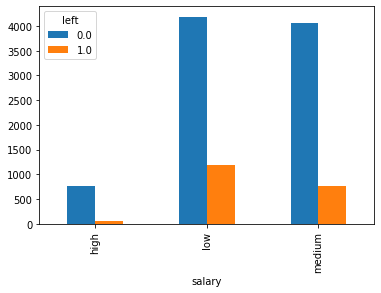

In [54]:
pd.crosstab(df.salary,df.left).plot(kind = 'bar')

##above graph shows that higher the salary lower the left candidate

## Checking relation between Department and left

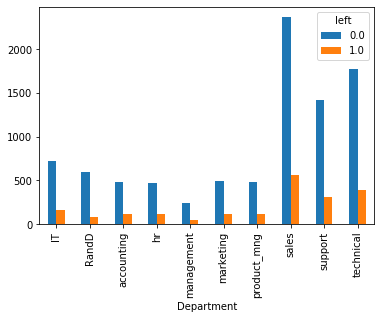

In [55]:
pd.crosstab(df.Department,df.left).plot(kind = 'bar')

##From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

In [56]:
x = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
x

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157.0,0.0,low
1,0.80,262.0,0.0,medium
2,0.11,272.0,0.0,medium
3,0.72,223.0,0.0,low
4,0.37,159.0,0.0,low
...,...,...,...,...
11025,0.67,171.0,0.0,low
11026,0.86,274.0,0.0,low
11027,0.57,214.0,0.0,low
11028,0.86,171.0,0.0,low


In [57]:
dummies = pd.get_dummies(df['salary'])
dummies

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
11025,0,1,0
11026,0,1,0
11027,0,1,0
11028,0,1,0


In [58]:
X = pd.concat([x,dummies],axis = 'columns')
X

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157.0,0.0,low,0,1,0
1,0.80,262.0,0.0,medium,0,0,1
2,0.11,272.0,0.0,medium,0,0,1
3,0.72,223.0,0.0,low,0,1,0
4,0.37,159.0,0.0,low,0,1,0
...,...,...,...,...,...,...,...
11025,0.67,171.0,0.0,low,0,1,0
11026,0.86,274.0,0.0,low,0,1,0
11027,0.57,214.0,0.0,low,0,1,0
11028,0.86,171.0,0.0,low,0,1,0


In [59]:
X = X.drop('salary',axis ='columns')
X

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157.0,0.0,0,1,0
1,0.80,262.0,0.0,0,0,1
2,0.11,272.0,0.0,0,0,1
3,0.72,223.0,0.0,0,1,0
4,0.37,159.0,0.0,0,1,0
...,...,...,...,...,...,...
11025,0.67,171.0,0.0,0,1,0
11026,0.86,274.0,0.0,0,1,0
11027,0.57,214.0,0.0,0,1,0
11028,0.86,171.0,0.0,0,1,0


In [60]:
y = df['left']
y

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
11025    0.0
11026    0.0
11027    0.0
11028    0.0
11029    0.0
Name: left, Length: 11030, dtype: float64

In [61]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
model = LogisticRegression()

In [79]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
 for i in model.predict(X_test):
        print(i)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0


In [81]:
y_test

8054     0.0
1595     1.0
8029     0.0
4862     0.0
7189     0.0
        ... 
8288     0.0
674      1.0
7305     0.0
10287    0.0
7011     0.0
Name: left, Length: 7721, dtype: float64

In [82]:
model.score(X_test,y_test)

0.8392695246729698

In [83]:
model.predict_proba(X_test)

array([[0.87593194, 0.12406806],
       [0.75485161, 0.24514839],
       [0.71743476, 0.28256524],
       ...,
       [0.71890349, 0.28109651],
       [0.90989715, 0.09010285],
       [0.99000485, 0.00999515]])